In [ ]:
# Dataset obtained from ChemSpace Database

In [248]:
import pandas as pd
import numpy as np
import seaborn as sn
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [249]:
dataset = PandasTools.LoadSDF(r"C:\Users\sneha\Desktop\Comp Chem\vscode\ChemSpace_Simvastatin_similar_comp.sdf")
dataset.head()

,CS-id,link,smiles,iupac_name,cas,mfcd,Total Molweight,ID,ROMol
0,CSSB00000743840,https://chem-space.com/CSSB00000743840,CCC(C)(C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)...,"(1S,3R,7S,8S,8aR)-8-{2-[(2R,4R)-4-hydroxy-6-ox...",79902-63-9,MFCD00072007,418.572,CSSB00000743840,<rdkit.Chem.rdchem.Mol object at 0x00000285AFB...
1,CSSB00020590635,https://chem-space.com/CSSB00020590635,CCC(C)(C)C(=O)OC1CC(C)C=C2C=CC(C)C(CCC3CC(O)CC...,"8-[2-(4-hydroxy-6-oxooxan-2-yl)ethyl]-3,7-dime...",892395-81-2,MFCD08064836,418.572,CSSB00020590635,<rdkit.Chem.rdchem.Mol object at 0x00000285A9A...
2,CSSB02515421289,https://chem-space.com/CSSB02515421289,CCC(C)(C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)...,"(1S,3R,7S,8S)-8-{2-[(2R,4R)-4-hydroxy-6-oxooxa...",79902-63-9,MFCD00072007,418.572,CSSB02515421289,<rdkit.Chem.rdchem.Mol object at 0x00000285A9A...
3,CSSB00020663371,https://chem-space.com/CSSB00020663371,CCC(C)(C)C(=O)O[C@H]1CC(=C)C=C2C=C[C@H](C)[C@H...,"(1S,7S,8S,8aR)-8-{2-[(2R,4R)-4-hydroxy-6-oxoox...",121624-18-8,,416.556,CSSB00020663371,<rdkit.Chem.rdchem.Mol object at 0x00000285A9A...
4,CSSB00160816093,https://chem-space.com/CSSB00160816093,[2H]C([2H])([2H])C(CC)(C(=O)O[C@H]1C[C@@H](C)C...,"(1S,3R,7S,8S,8aR)-8-{2-[(2R,4R)-4-hydroxy-6-ox...",1002347-71-8,,424.609,CSSB00160816093,<rdkit.Chem.rdchem.Mol object at 0x00000285A9A...


In [250]:
len(dataset)

2000

In [251]:
PandasTools.AddMoleculeColumnToFrame(dataset,'smiles', 'Structure')
dataset.head()

,CS-id,link,smiles,iupac_name,cas,mfcd,Total Molweight,ID,ROMol,Structure
0,CSSB00000743840,https://chem-space.com/CSSB00000743840,CCC(C)(C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)...,"(1S,3R,7S,8S,8aR)-8-{2-[(2R,4R)-4-hydroxy-6-ox...",79902-63-9,MFCD00072007,418.572,CSSB00000743840,<rdkit.Chem.rdchem.Mol object at 0x00000285AFB...,<rdkit.Chem.rdchem.Mol object at 0x00000285B3D...
1,CSSB00020590635,https://chem-space.com/CSSB00020590635,CCC(C)(C)C(=O)OC1CC(C)C=C2C=CC(C)C(CCC3CC(O)CC...,"8-[2-(4-hydroxy-6-oxooxan-2-yl)ethyl]-3,7-dime...",892395-81-2,MFCD08064836,418.572,CSSB00020590635,<rdkit.Chem.rdchem.Mol object at 0x00000285A9A...,<rdkit.Chem.rdchem.Mol object at 0x00000285B3D...
2,CSSB02515421289,https://chem-space.com/CSSB02515421289,CCC(C)(C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C)...,"(1S,3R,7S,8S)-8-{2-[(2R,4R)-4-hydroxy-6-oxooxa...",79902-63-9,MFCD00072007,418.572,CSSB02515421289,<rdkit.Chem.rdchem.Mol object at 0x00000285A9A...,<rdkit.Chem.rdchem.Mol object at 0x00000285B3D...
3,CSSB00020663371,https://chem-space.com/CSSB00020663371,CCC(C)(C)C(=O)O[C@H]1CC(=C)C=C2C=C[C@H](C)[C@H...,"(1S,7S,8S,8aR)-8-{2-[(2R,4R)-4-hydroxy-6-oxoox...",121624-18-8,,416.556,CSSB00020663371,<rdkit.Chem.rdchem.Mol object at 0x00000285A9A...,<rdkit.Chem.rdchem.Mol object at 0x00000285B3D...
4,CSSB00160816093,https://chem-space.com/CSSB00160816093,[2H]C([2H])([2H])C(CC)(C(=O)O[C@H]1C[C@@H](C)C...,"(1S,3R,7S,8S,8aR)-8-{2-[(2R,4R)-4-hydroxy-6-ox...",1002347-71-8,,424.609,CSSB00160816093,<rdkit.Chem.rdchem.Mol object at 0x00000285A9A...,<rdkit.Chem.rdchem.Mol object at 0x00000285B3D...


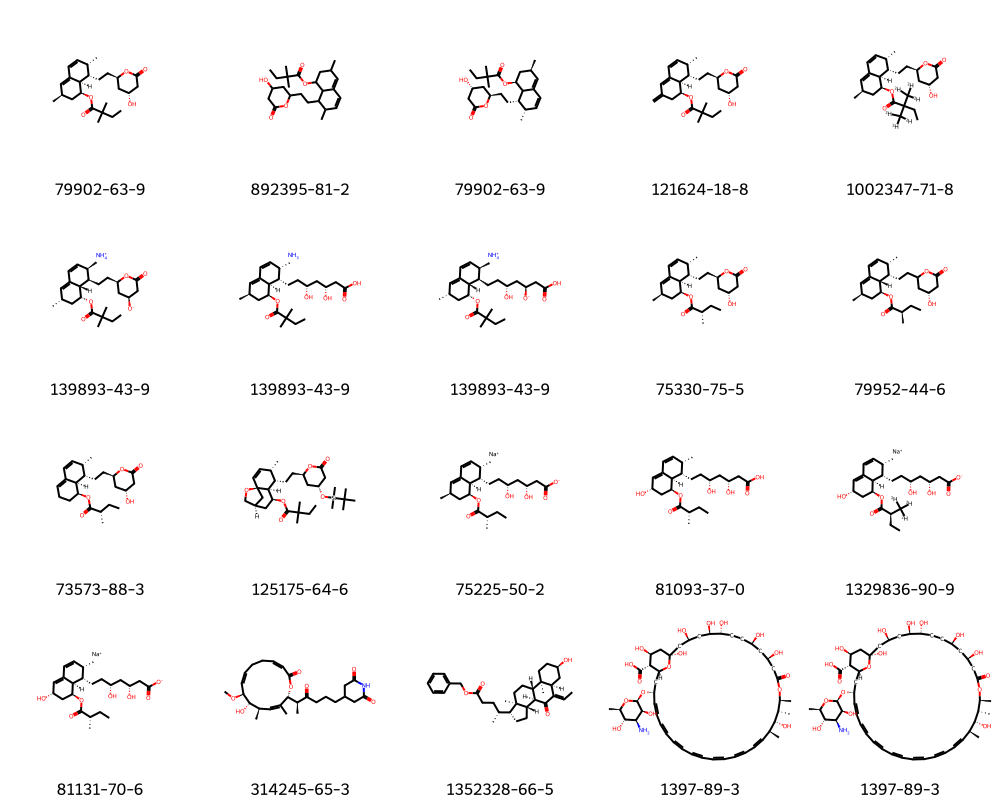

In [287]:
Draw.MolsToGridImage([x for x in dataset["Structure"]][:20], maxMols=100, 
                legends=[str(x) for x in dataset.cas], subImgSize=(200,200), molsPerRow=5)                   

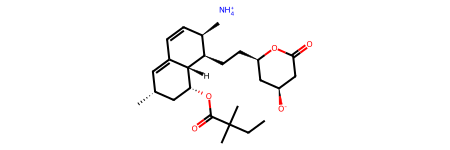

In [253]:
dataset.Structure[5]

In [254]:
from rdkit.Chem import MACCSkeys
MCkeys = MACCSkeys.GenMACCSKeys(dataset.Structure[5])

print(np.array(MCkeys))
len(MCkeys)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0
 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1
 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1]


167

In [255]:
from rdkit.Avalon import pyAvalonTools
Av = pyAvalonTools.GetAvalonFP(dataset.Structure[5])

print(np.array(Av))

[1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0
 1 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0
 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0
 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0
 0 0 1 0 1 1 0 1 0 0 0 0 

In [256]:
from rdkit.Chem import rdMolDescriptors
AP = rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(dataset.Structure[5], nBits=512)

print(np.array(AP))

[1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1
 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1
 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1
 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1
 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1
 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0
 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1
 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0 0 1 1 1 1 1 1 0 0 1 

In [289]:
TT = rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(dataset.Structure[0], nBits=512)
print(np.array(TT))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [291]:
print("Index of On bits:",tuple(TT.GetOnBits()))
print("Number of On bits: ",len(TT.GetOnBits()))

Index of On bits: (24, 28, 29, 64, 80, 81, 104, 112, 113, 132, 133, 144, 148, 149, 152, 153, 164, 168, 169, 172, 173, 174, 196, 200, 204, 205, 208, 216, 217, 236, 248, 249, 268, 272, 273, 280, 312, 313, 332, 344, 345, 346, 360, 380, 388, 389, 396, 408, 416, 424, 472, 473, 496)
Number of On bits:  53


In [293]:
onbits = {}
MorgFing = AllChem.GetMorganFingerprintAsBitVect(dataset.Structure[0], 2, nBits=512, bitInfo=onbits)
print(np.array(MorgFing))

[1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 

In [299]:
print("Index of On bits:",tuple(MorgFing.GetOnBits()))

print("Number of On bits: ",len(MorgFing.GetOnBits()))

Index of On bits: (0, 5, 33, 35, 39, 47, 57, 59, 70, 78, 79, 80, 85, 87, 102, 114, 117, 131, 138, 141, 144, 168, 183, 185, 207, 210, 231, 233, 238, 268, 277, 285, 286, 288, 294, 295, 314, 320, 337, 349, 356, 367, 370, 380, 381, 392, 406, 412, 414, 433, 446, 458, 463, 492, 503, 507)
Number of On bits:  56


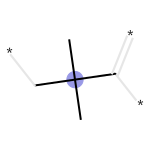

In [302]:
Draw.DrawMorganBit(dataset.Structure[5], 392, onbits)

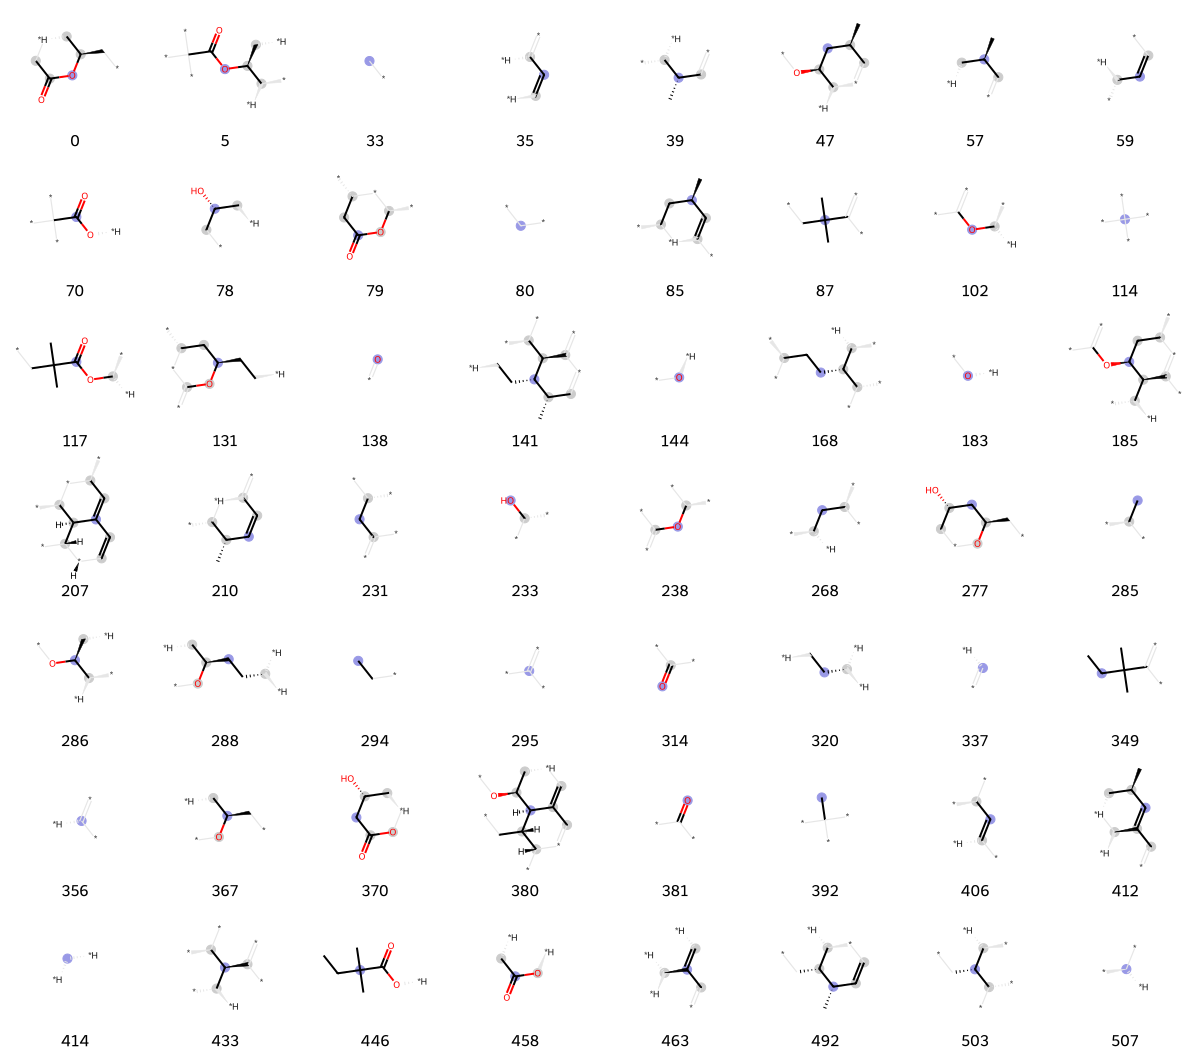

In [309]:
all_fragments = [(dataset.Structure[0], x, onbits) for x in MorgFing.GetOnBits()]
Draw.DrawMorganBits(all_fragments[:],molsPerRow=8, legends=[str(x) for x in MorgFing.GetOnBits()][:])

In [318]:
def generate_fpts(data):
    
        Mfpts = []
    
        Avfpts = []
    
        TT_fpts = []
    
        for mol in tqdm(data):
        
            mfpt = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
            Mfpts.append(mfpt)
        
            Avfpt = pyAvalonTools.GetAvalonFP(mol, nBits=2048)
            Avfpts.append(Avfpt)
        
            TT_fpt = rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(mol, nBits=2048)
            TT_fpts.append(TT_fpt)
        
        return np.array(Mfpts), np.array(Avfpts), np.array(TT_fpts)

In [320]:
mfpts, Avfpts, TT_fpts = generate_fpts(dataset.Structure[:2000])

100%|██████████| 2000/2000 [00:04<00:00, 443.44it/s]


In [323]:
mfpts.shape

(2000, 2048)

In [322]:
Avfpts.shape

(2000, 2048)

In [324]:
TT_fpts.shape

(2000, 2048)